In [1]:
from soccer_database import create_connection, mongo_retrieve, post_retrieve
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import squarify

### OPTIONS

In [2]:
pd.set_option('display.width', None)
plt.style.use('ggplot')

### Connection and retrieving data

In [3]:
mongo_db, mongo_client, pg_conn = create_connection()

***

## APPEARENCES (MONGO_DB)

**INFO** : how many yellow,red, goals, assists, minutes has a specific player

- _id
- game_id
- player_id
- player_club_id
- player_current_club_id
- date
- player_name
- competition_id
- yellow_cards
- red_cards
- goals
- assists
- minutes_played


In [4]:
appearences = mongo_retrieve(mongo_db, "appearances")
df_appear = pd.DataFrame(appearences)
df_appear

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


#### APPEARENCES DETAILS

In [5]:
df_appear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507351 entries, 0 to 1507350
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   game_id                 1507351 non-null  int64         
 1   player_id               1507351 non-null  int64         
 2   player_club_id          1507351 non-null  int64         
 3   player_current_club_id  1507351 non-null  int64         
 4   date                    1507351 non-null  datetime64[ns]
 5   player_name             1507027 non-null  object        
 6   competition_id          1507351 non-null  object        
 7   yellow_cards            1507351 non-null  int64         
 8   red_cards               1507351 non-null  int64         
 9   goals                   1507351 non-null  int64         
 10  assists                 1507351 non-null  int64         
 11  minutes_played          1507351 non-null  int64         
dtypes: datetime64[

***
## CLUB_GAMES (MONGO_DB)

**INFO** : Club vs Opponent game and who wins the match 

- _id
- game_id
- club_id
- own_goals
- own_manager_name
- opponent_id
- opponent_goals
- opponent_manager_name
- hosting
- is_win

In [6]:
club_games = mongo_retrieve(mongo_db, "club_games")
df_club_games = pd.DataFrame(club_games)
df_club_games

,game_id,club_id,own_goals,own_manager_name,opponent_id,opponent_goals,opponent_manager_name,hosting,is_win,own_position,opponent_position
0,2221751,431,1,Lutz Göttling,60,2,Christian Streich,Home,0,NaN,NaN
1,2221755,83,3,Ralph Hasenhüttl,4795,0,Tomas Oral,Home,1,NaN,NaN
2,2222597,3725,2,Stanislav Cherchesov,232,1,Unai Emery,Home,1,2.0,5.0
3,2222627,2696,0,Andrey Kobelev,4128,2,Rustem Khuzin,Home,0,11.0,10.0
4,2222658,2410,0,Leonid Slutski,121,2,Dan Petrescu,Home,0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
130427,4126931,20923,2,Sergey Perednya,12065,1,Aleksandr Gorbachev,Away,1,NaN,NaN
130428,4148237,920,0,Ruaidhri Higgins,10481,1,Milic Curcic,Away,0,NaN,NaN
130429,4171268,681,2,Imanol Alguacil,409,0,Gerhard Struber,Away,1,NaN,NaN
130430,4148252,144,3,Sergej Jakirovic,10532,1,Dan Brimsvík,Away,1,NaN,NaN


#### CLUB GAMES DETAILS

In [7]:
df_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130432 entries, 0 to 130431
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                130432 non-null  int64  
 1   club_id                130432 non-null  int64  
 2   own_goals              130432 non-null  int64  
 3   own_manager_name       128948 non-null  object 
 4   opponent_id            130432 non-null  int64  
 5   opponent_goals         130432 non-null  int64  
 6   opponent_manager_name  128948 non-null  object 
 7   hosting                130432 non-null  object 
 8   is_win                 130432 non-null  int64  
 9   own_position           91524 non-null   float64
 10  opponent_position      91524 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 10.9+ MB


***

## GAME_EVENTS (MONGO_DB)

**INFO** :  Events happens during a match and who did it

- _id
- date
- game_id
- minute
- type
- club_id
- player_id
- description

In [8]:
game_events = mongo_retrieve(mongo_db, "game_events")
df_events = pd.DataFrame(game_events)
df_events

,date,game_id,minute,type,club_id,player_id,description,player_assist_id,player_in_id,player_name,assist_name
0,2012-08-05,2211607.0,77.0,Cards,610.0,4425.0,"1. Yellow card , Mass confrontation",NaN,NaN,Theo Janssen,NaN
1,2012-08-05,2211607.0,77.0,Cards,383.0,33210.0,"1. Yellow card , Mass confrontation",NaN,NaN,Przemyslaw Tyton,NaN
2,2012-08-05,2211607.0,3.0,Goals,383.0,36500.0,", Header, 1. Tournament Goal Assist: , Corner,...",56416.0,NaN,Ola Toivonen,Dries Mertens
3,2012-08-05,2211607.0,53.0,Goals,383.0,36500.0,", Right-footed shot, 2. Tournament Goal Assist...",146258.0,NaN,Ola Toivonen,Jetro Willems
4,2012-08-05,2211607.0,74.0,Substitutions,383.0,36500.0,", Not reported",NaN,49499.0,Ola Toivonen,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30700,2012-10-06,2242862.0,17.0,Goals,367.0,58076.0,", Left-footed shot, 2. Goal of the Season Assist:",NaN,NaN,Piti,NaN
30701,2012-10-06,2242862.0,64.0,Substitutions,367.0,58076.0,", Not reported",NaN,182963.0,Piti,NaN
30702,2012-10-06,2242862.0,77.0,Cards,367.0,58774.0,"3. Yellow card , Foul",NaN,NaN,José Manuel Casado,NaN
30703,2012-10-06,2242862.0,41.0,Goals,897.0,64339.0,", Penalty, 2. Goal of the Season Assist: Handb...",128295.0,NaN,Pizzi,Tito


#### GAME EVENTS DETAILS

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30705 entries, 0 to 30704
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              30704 non-null  datetime64[ns]
 1   game_id           30704 non-null  float64       
 2   minute            30704 non-null  float64       
 3   type              30704 non-null  object        
 4   club_id           30704 non-null  float64       
 5   player_id         30704 non-null  float64       
 6   description       30704 non-null  object        
 7   player_assist_id  30704 non-null  object        
 8   player_in_id      30704 non-null  object        
 9   player_name       30704 non-null  object        
 10  assist_name       30704 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 2.6+ MB


***

## GAME_LINEUPS (MONGO_DB)

**INFO** : List of players starting type and position on a game 

- _id
- game_id
- club_id
- type
- number
- player_id
- player_name
- team_captain
- position

In [10]:
game_lineups = mongo_retrieve(mongo_db, "game_lineups")
df_lineups = pd.DataFrame(game_lineups)
df_lineups

,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back
...,...,...,...,...,...,...,...,...
119128,4228114,46889,substitutes,3,1200869,Thomas Chambers,0,Left-Back
119129,4228114,46889,substitutes,5,1203716,Mohammed-Idris Oshilaja,0,Defender
119130,4228114,46889,substitutes,13,1200870,Max Ovenden,0,Goalkeeper
119131,4228114,46889,substitutes,12,550816,Julien Anau,0,Attacking Midfield


## GAME LINEUPS DETAILS

In [11]:
df_lineups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119133 entries, 0 to 119132
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       119133 non-null  int64 
 1   club_id       119133 non-null  int64 
 2   type          119133 non-null  object
 3   number        119133 non-null  object
 4   player_id     119133 non-null  int64 
 5   player_name   119133 non-null  object
 6   team_captain  119133 non-null  int64 
 7   position      119133 non-null  object
dtypes: int64(4), object(4)
memory usage: 7.3+ MB


***

#### GAMES (MONGO_DB)

**INFO** : List of every played game

- _id
- game_id
- competition_id
- season
- round
- date
- home_club_id
- away_club_id
- home_club_goals
- away_club_goals
- home_club_position
- away_club_position
- home_club_manager_name
- away_club_manager_name
- stadium
- attendance
- referee
- url
- home_club_name
- away_club_name
- aggregate
- competition_type

In [12]:
games = mongo_retrieve(mongo_db, "games")
df_games = pd.DataFrame(games)
df_games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type,competition_name
0,2222597,RU1,2012,6. Matchday,2012-08-25 00:00:00,3725,232,2,1,2.0,...,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,premier-liga
1,2222627,RU1,2012,5. Matchday,2012-08-20 00:00:00,2696,4128,0,2,11.0,...,Rustem Khuzin,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,premier-liga
2,2222658,RU1,2012,10. Matchday,2012-09-30 00:00:00,2410,121,0,2,2.0,...,Dan Petrescu,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,premier-liga
3,2222664,RU1,2012,8. Matchday,2012-09-15 00:00:00,932,2698,1,0,5.0,...,Kurban Berdyev,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league,premier-liga
4,2222683,RU1,2012,12. Matchday,2012-10-22 00:00:00,2696,12438,0,1,11.0,...,Gadzhi Gadzhiev,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league,premier-liga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51637,4095969,L1,2023,1. Matchday,2023-08-20 00:00:00,89,39,4,1,3.0,...,Bo Svensson,Stadion An der Alten Försterei,22012.0,Tobias Stieler,https://www.transfermarkt.co.uk/1-fc-union-ber...,1. FC Union Berlin,1. Fußball- und Sportverein Mainz 05,4:1,domestic_league,bundesliga
51638,4098048,NL1,2023,13. Matchday,2023-11-25 00:00:00,317,383,0,3,4.0,...,Peter Bosz,De Grolsch Veste,30000.0,Allard Lindhout,https://www.transfermarkt.co.uk/twente-ensched...,Football Club Twente,Eindhovense Voetbalvereniging Philips Sport Ve...,0:3,domestic_league,eredivisie
51639,4120903,SC1,2023,10. Matchday,2023-10-29 00:00:00,2553,370,2,0,4.0,...,Barry Robson,"BBSP Stadium, Rugby Park",5480.0,Kevin Clancy,https://www.transfermarkt.co.uk/kilmarnock-fc_...,Kilmarnock Football Club,Aberdeen Football Club,2:0,domestic_league,scottish-premiership
51640,4126817,TR1,2023,3. Matchday,2023-08-26 00:00:00,449,126,2,3,13.0,...,İlhan Palut,Papara Park,23571.0,Halil Umut Meler,https://www.transfermarkt.co.uk/trabzonspor_ca...,Trabzonspor Kulübü,Çaykur Rizespor Kulübü,2:3,domestic_league,super-lig


#### GAMES DETAILS

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51642 entries, 0 to 51641
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 51642 non-null  int64 
 1   competition_id          51642 non-null  object
 2   season                  51642 non-null  int64 
 3   round                   51642 non-null  object
 4   date                    51642 non-null  object
 5   home_club_id            51642 non-null  int64 
 6   away_club_id            51642 non-null  int64 
 7   home_club_goals         51642 non-null  int64 
 8   away_club_goals         51642 non-null  int64 
 9   home_club_position      51642 non-null  object
 10  away_club_position      51642 non-null  object
 11  home_club_manager_name  51642 non-null  object
 12  away_club_manager_name  51642 non-null  object
 13  stadium                 51642 non-null  object
 14  attendance              51642 non-null  object
 15  re

***

## CLUBS (POSTGRES)

**INFO** : All the information about soccer clubs 

- club_id
- club_code
- name
- domestic_competition_id
- total_market_value
- squad_size
- average_age
- foreigners_number
- foreigners_percentage
- national_team_players
- stadium_name
- stadium_seats
- net_transfer_record
- coach_name
- last_season
- url

In [14]:
clubs = post_retrieve(pg_conn, "clubs")
df_clubs = pd.DataFrame(clubs)
df_clubs

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,None,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,None,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,None,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,None,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,None,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,None,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,None,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,None,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,None,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,None,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,None,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,None,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,None,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,None,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,None,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,None,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,None,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,None,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


#### CLUBS DETAILS

In [15]:
df_clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   club_id                  426 non-null    int64 
 1   club_code                426 non-null    object
 2   name                     426 non-null    object
 3   domestic_competition_id  426 non-null    object
 4   total_market_value       0 non-null      object
 5   squad_size               426 non-null    int64 
 6   average_age              388 non-null    object
 7   foreigners_number        426 non-null    int64 
 8   foreigners_percentage    379 non-null    object
 9   national_team_players    426 non-null    int64 
 10  stadium_name             426 non-null    object
 11  stadium_seats            426 non-null    int64 
 12  net_transfer_record      426 non-null    object
 13  coach_name               0 non-null      object
 14  last_season              426 non-null    i

***

## COMPETITIONS (POSTGRES)

**INFO** : Information about existing soccer competition around the world 

- competition_id
- competition_code
- name
- sub_type
- type
- country_id
- country_name
- domestic_league_code
- confederation
- url

In [16]:
competitions = post_retrieve(pg_conn, "competitions")
df_competitions = pd.DataFrame(competitions)
df_competitions

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,None,None,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...
8,EL,europa-league,europa-league,europa_league,international_cup,-1,None,None,europa,https://www.transfermarkt.co.uk/europa-league/...
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...


#### COMPETITIONS DETAILS

In [17]:
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   competition_id        42 non-null     object
 1   competition_code      42 non-null     object
 2   name                  42 non-null     object
 3   sub_type              42 non-null     object
 4   type                  42 non-null     object
 5   country_id            42 non-null     object
 6   country_name          35 non-null     object
 7   domestic_league_code  35 non-null     object
 8   confederation         42 non-null     object
 9   url                   42 non-null     object
dtypes: object(10)
memory usage: 3.4+ KB


***

## PLAYERS (POSTGRES)

**INFO** : Information about players

- player_id
- first_name
- last_name
- name
- last_season
- current_club_id
- player_code
- country_of_birth
- city_of_birth
- country_of_citizenship
- date_of_birth
- sub_position
- position
- foot
- height_in_cm
- market_value_in_eur
- highest_market_value_in_eur
- contract_expiration_date
- agent_name
- image_url
- url
- current_club_domestic_competition_id
- current_club_name

In [18]:
players = post_retrieve(pg_conn, "players")
df_players = pd.DataFrame(players)
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,None,NaN,NaN,10000000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,None,NaN,NaN,12000000.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,None,NaN,NaN,2750000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,None,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,...,right,190.0,10000000.0,10000000.0,2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,...,right,188.0,325000.0,350000.0,2025-06-30,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,...,right,180.0,4500000.0,4500000.0,2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,...,None,NaN,75000.0,75000.0,2023-06-30,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio


#### PLAYERS DETAILS

In [19]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30302 non-null  int64  
 1   first_name                            28337 non-null  object 
 2   last_name                             30302 non-null  object 
 3   name                                  30302 non-null  object 
 4   last_season                           30302 non-null  int64  
 5   current_club_id                       30302 non-null  int64  
 6   player_code                           30302 non-null  object 
 7   country_of_birth                      27613 non-null  object 
 8   city_of_birth                         28099 non-null  object 
 9   country_of_citizenship                29759 non-null  object 
 10  date_of_birth                         30255 non-null  object 
 11  sub_position   

---
## STEP 1: APPEAR

In [20]:
df_appear = df_appear.dropna(subset=['player_name'])

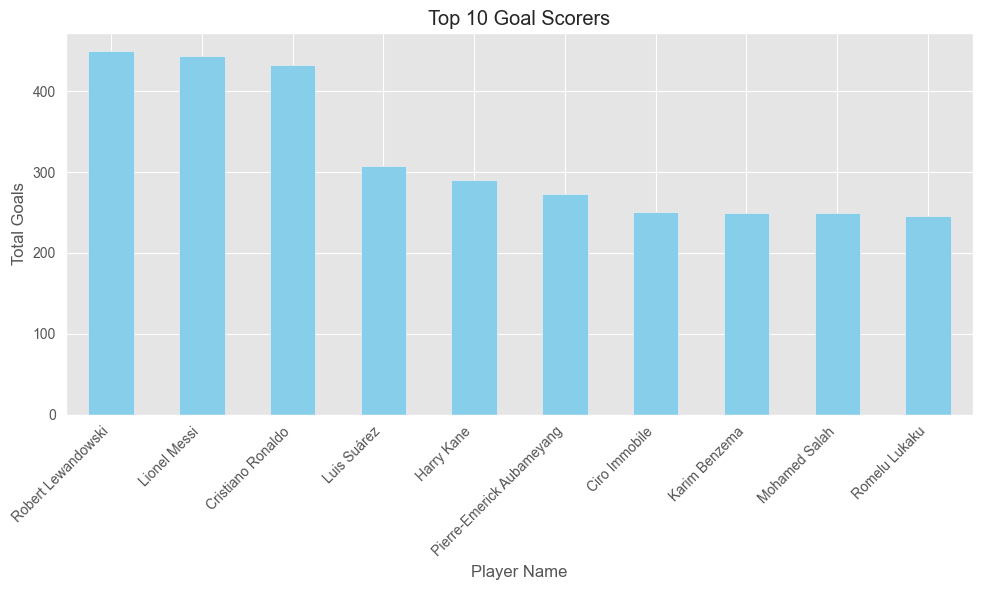

In [21]:
# Top Goal Scorers
top_scorers = df_appear.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(10)

# Plotting Top Goal Scorers
plt.figure(figsize=(10, 6))
top_scorers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Player Name')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

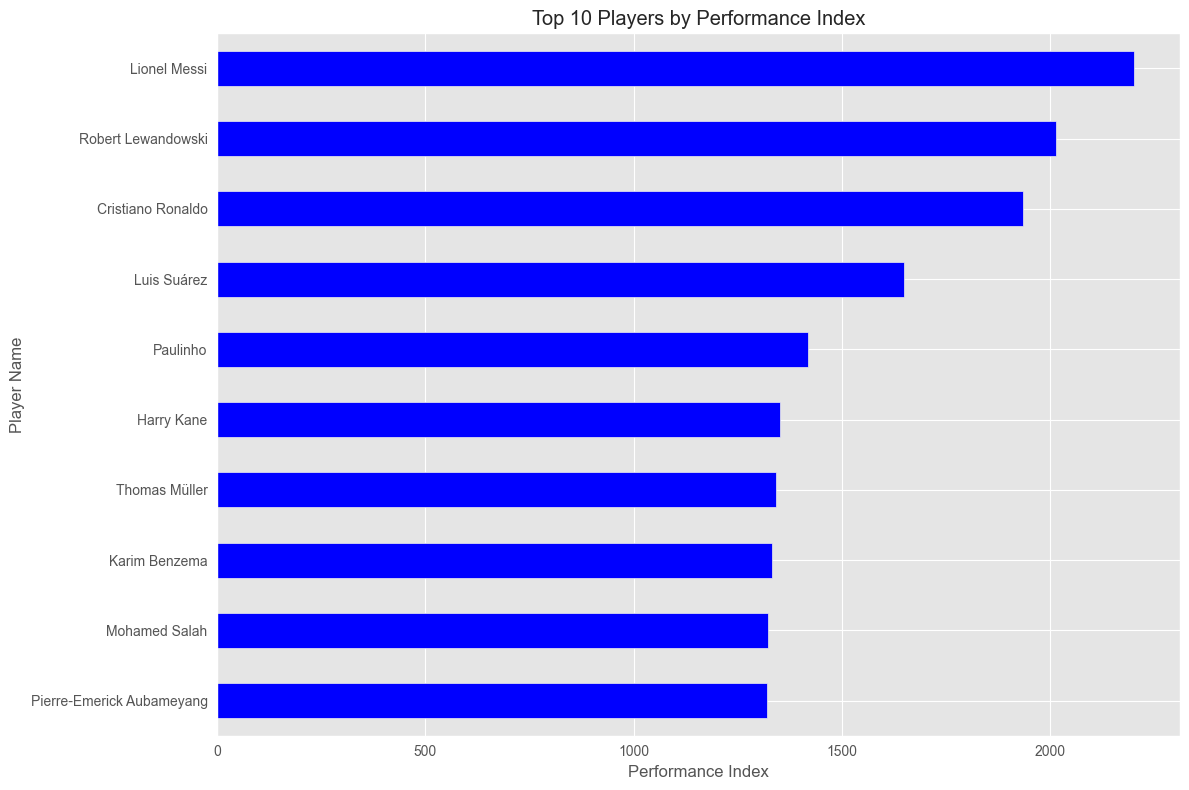

In [48]:
# Create a Player Performance Index
df_appear.loc[:, 'performance_index'] = df_appear['goals'] * 3 + df_appear['assists'] * 2 + df_appear['minutes_played'] * 0.01

# Top 10 Players by Performance Index
top_performers = df_appear.groupby('player_name')['performance_index'].sum().sort_values(ascending=False).head(10)

# Plotting Top Performers using a horizontal bar chart
plt.figure(figsize=(12, 8))
top_performers.plot(kind='barh', color='blue')
plt.title('Top 10 Players by Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Player Name')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

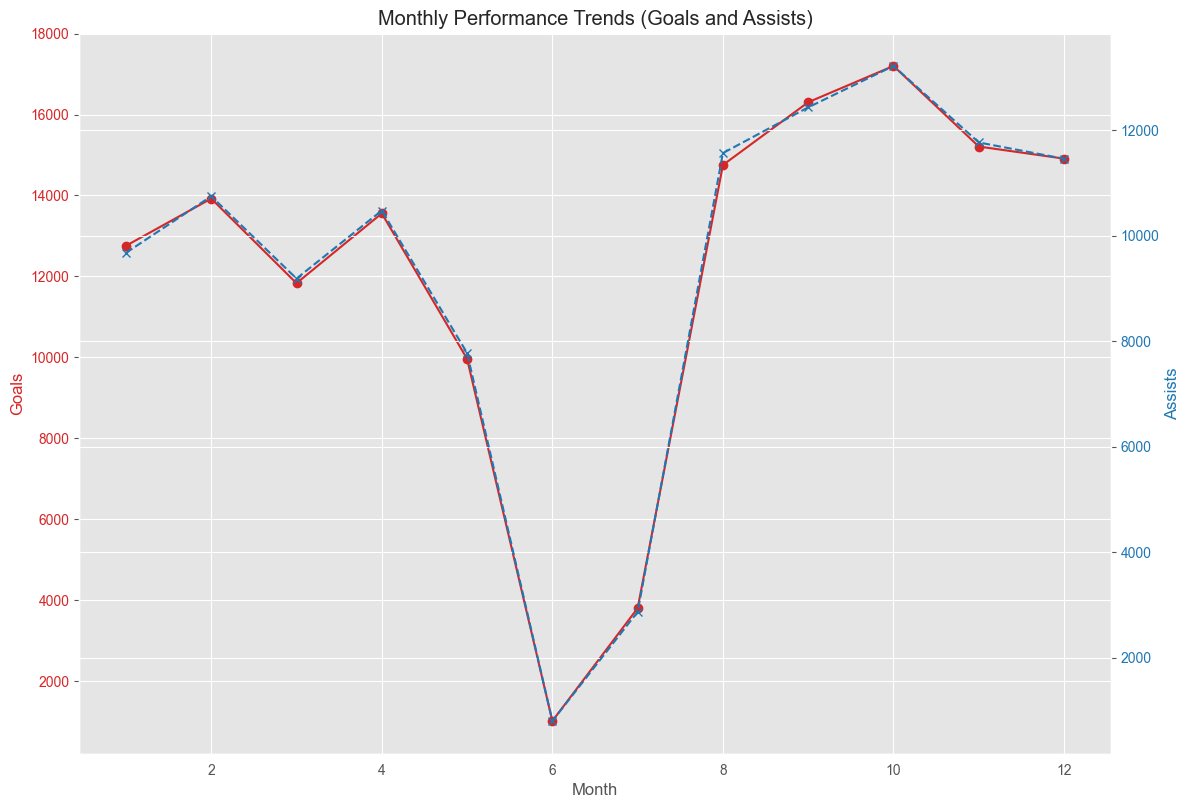

In [49]:
df_appear.loc[:, 'date'] = pd.to_datetime(df_appear['date'])

# Extract month from date
df_appear.loc[:, 'month'] = df_appear['date'].dt.month

# Monthly goals and assists
monthly_performance = df_appear.groupby('month')[['goals', 'assists']].sum()

# Plotting Monthly Performance using a line chart with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_xlabel('Month')
ax1.set_ylabel('Goals', color='tab:red')
ax1.plot(monthly_performance.index, monthly_performance['goals'], color='tab:red', marker='o', label='Goals')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Assists', color='tab:blue')
ax2.plot(monthly_performance.index, monthly_performance['assists'], color='tab:blue', marker='x', linestyle='--', label='Assists')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # to prevent overlap of labels
plt.title('Monthly Performance Trends (Goals and Assists)')
plt.show()

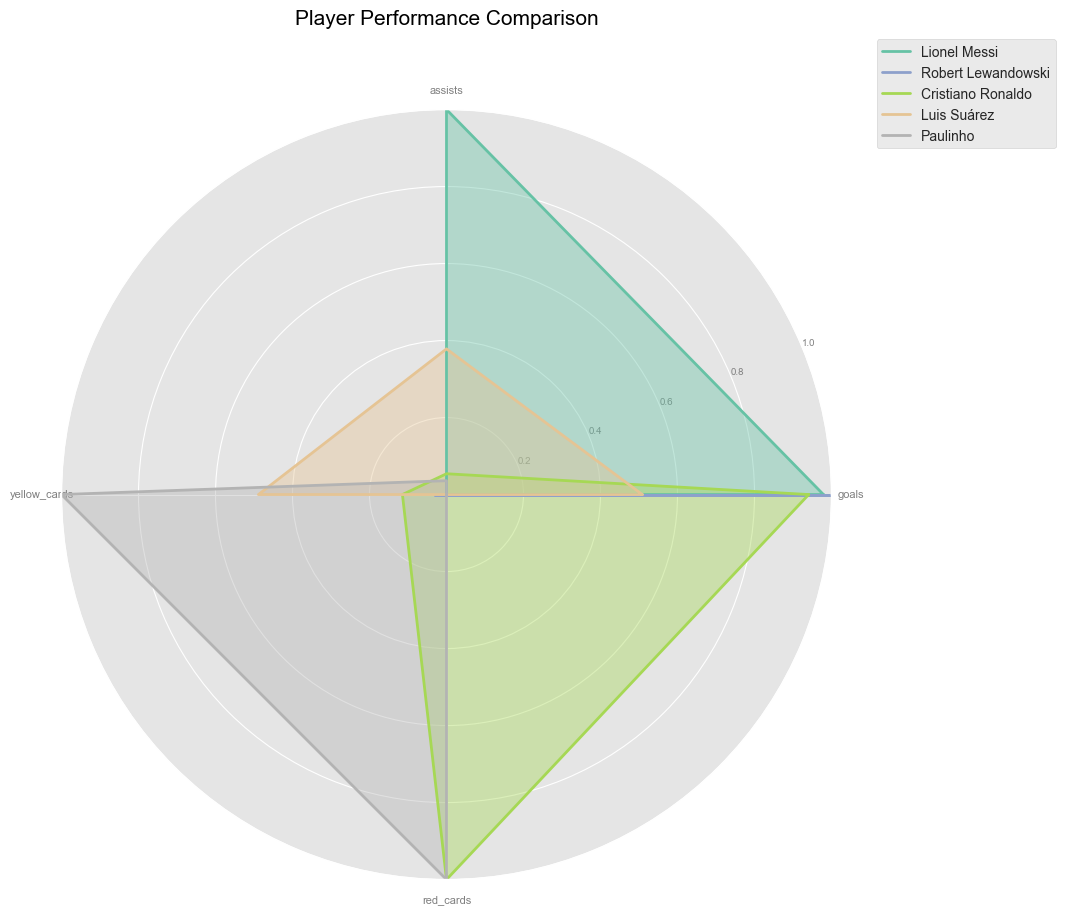

In [24]:
# Ensure necessary columns are numeric using .loc
df_appear.loc[:, 'goals'] = pd.to_numeric(df_appear['goals'], errors='coerce')
df_appear.loc[:, 'assists'] = pd.to_numeric(df_appear['assists'], errors='coerce')
df_appear.loc[:, 'yellow_cards'] = pd.to_numeric(df_appear['yellow_cards'], errors='coerce')
df_appear.loc[:, 'red_cards'] = pd.to_numeric(df_appear['red_cards'], errors='coerce')
df_appear.loc[:, 'performance_index'] = pd.to_numeric(df_appear['performance_index'], errors='coerce')

# Aggregate data to get the top 5 players by performance_index
top_players = df_appear.groupby('player_name').agg({
    'goals': 'sum',
    'assists': 'sum',
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'performance_index': 'sum'
}).nlargest(5, 'performance_index').reset_index()

# Normalize the data and explicitly cast to float
df_normalized = top_players.copy()
for column in df_normalized.columns[1:-1]:
    df_normalized[column] = df_normalized[column].astype(float)
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())

# Radar Chart
def make_spider(df, colors):
    categories = list(df.columns)[1:-1]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for i, row in df.iterrows():
        values = row.drop(['player_name', 'performance_index']).values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=df['player_name'][i])
        ax.fill(angles, values, color=colors[i], alpha=0.4)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
    plt.ylim(0, 1)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title('Player Performance Comparison', size=15, color='black', y=1.1)

    plt.show()

# Create a color palette
colormap = plt.colormaps.get_cmap("Set2")
colors = colormap(np.linspace(0, 1, len(top_players.index)))

# Plot the radar chart
make_spider(df_normalized, colors)

---
## STEP 2: GAMES

In [25]:
def rename_columns_based_on_hosting(row):
    if row['hosting'] == 'home':
        return {
            'game_id': row['game_id'],
            'home_club_id': row['club_id'],
            'home_club_goals': row['own_goals'],
            'home_club_manager_name': row['own_manager_name'],
            'away_club_id': row['opponent_id'],
            'away_club_goals': row['opponent_goals'],
            'away_club_manager_name': row['opponent_manager_name'],
            'home_position': row['own_position'],
            'away_position': row['opponent_position']
        }
    else:
        return {
            'game_id': row['game_id'],
            'home_club_id': row['opponent_id'],
            'home_club_goals': row['opponent_goals'],
            'home_club_manager_name': row['opponent_manager_name'],
            'away_club_id': row['club_id'],
            'away_club_goals': row['own_goals'],
            'away_club_manager_name': row['own_manager_name'],
            'home_position': row['opponent_position'],
            'away_position': row['own_position']
        }

# Apply the transformation
transformed_df = df_club_games.apply(rename_columns_based_on_hosting, axis=1, result_type='expand')

# Drop the 'hosting' and 'is_win' columns
transformed_df.drop(columns=['hosting', 'is_win'], inplace=True, errors='ignore')


In [26]:
df_final_games = pd.merge(
    transformed_df,
    df_games,
    on=['game_id', 'home_club_id', 'away_club_id'],
    how='inner'
)

# Dropping duplicate columns from the merge
# List of columns to drop from df_games after merge
columns_to_drop = ['home_club_goals_y', 'away_club_goals_y', 'home_club_manager_name_y', 'away_club_manager_name_y', 'home_club_position_y', 'away_club_position_y', 'home_position', 'away_position']

# Rename columns from transformed_df to avoid confusion before dropping
df_final_games.rename(columns={
    'home_club_goals_x': 'home_club_goals',
    'away_club_goals_x': 'away_club_goals',
    'home_club_manager_name_x': 'home_club_manager_name',
    'away_club_manager_name_x': 'away_club_manager_name',
    'home_position_x': 'home_club_position',
    'away_position_x': 'away_club_position'
}, inplace=True)

# Drop the unnecessary columns
df_final_games.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_final_games.dropna(subset=['home_club_manager_name', 'away_club_manager_name'], inplace=True)

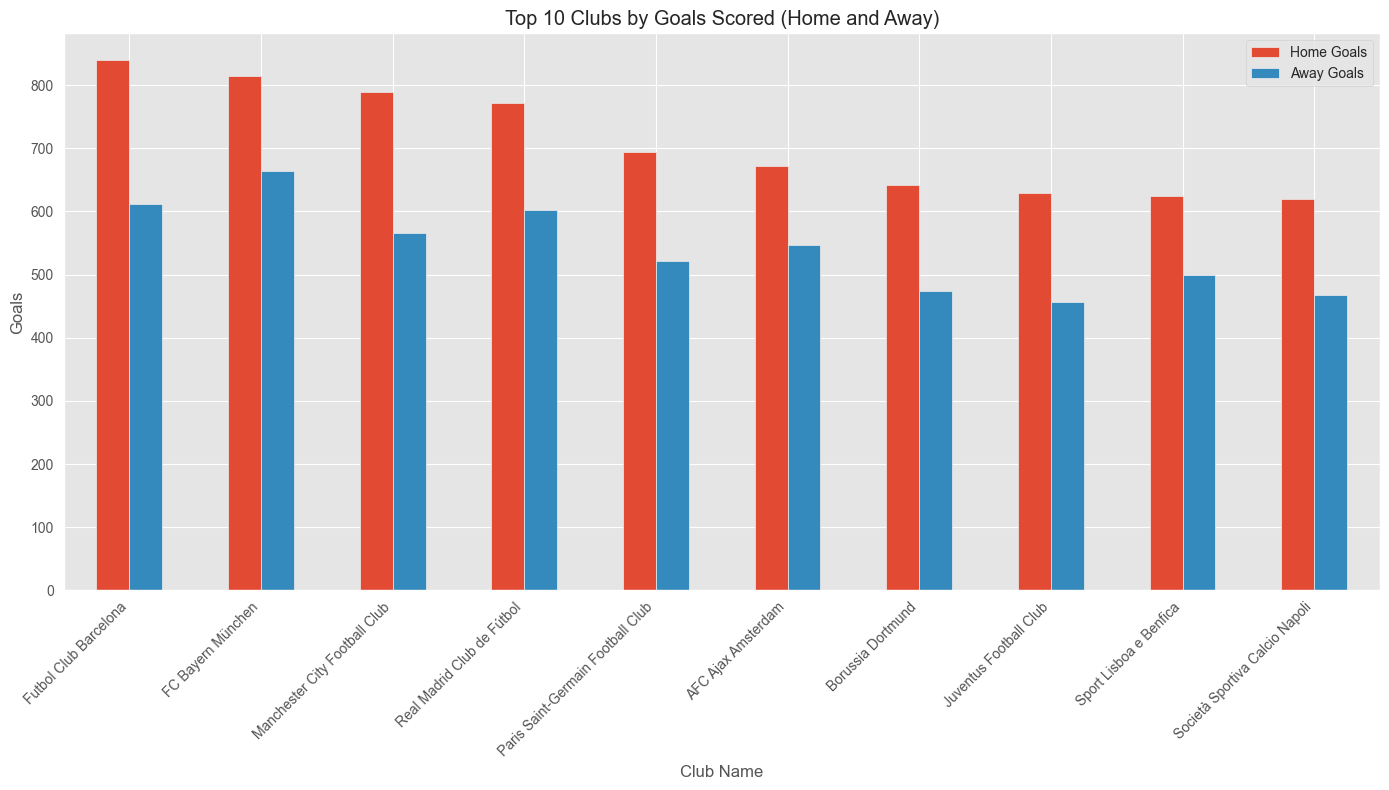

In [27]:
# Goals scored by home and away clubs
home_goals = df_final_games.groupby('home_club_name')['home_club_goals'].sum().sort_values(ascending=False)
away_goals = df_final_games.groupby('away_club_name')['away_club_goals'].sum().sort_values(ascending=False)

# Combine home and away goals into one DataFrame
goals_df = pd.DataFrame({
    'Home Goals': home_goals,
    'Away Goals': away_goals
}).fillna(0).sort_values(by='Home Goals', ascending=False).head(10)

# Plotting Goals Distribution by Club
goals_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top 10 Clubs by Goals Scored (Home and Away)')
plt.xlabel('Club Name')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

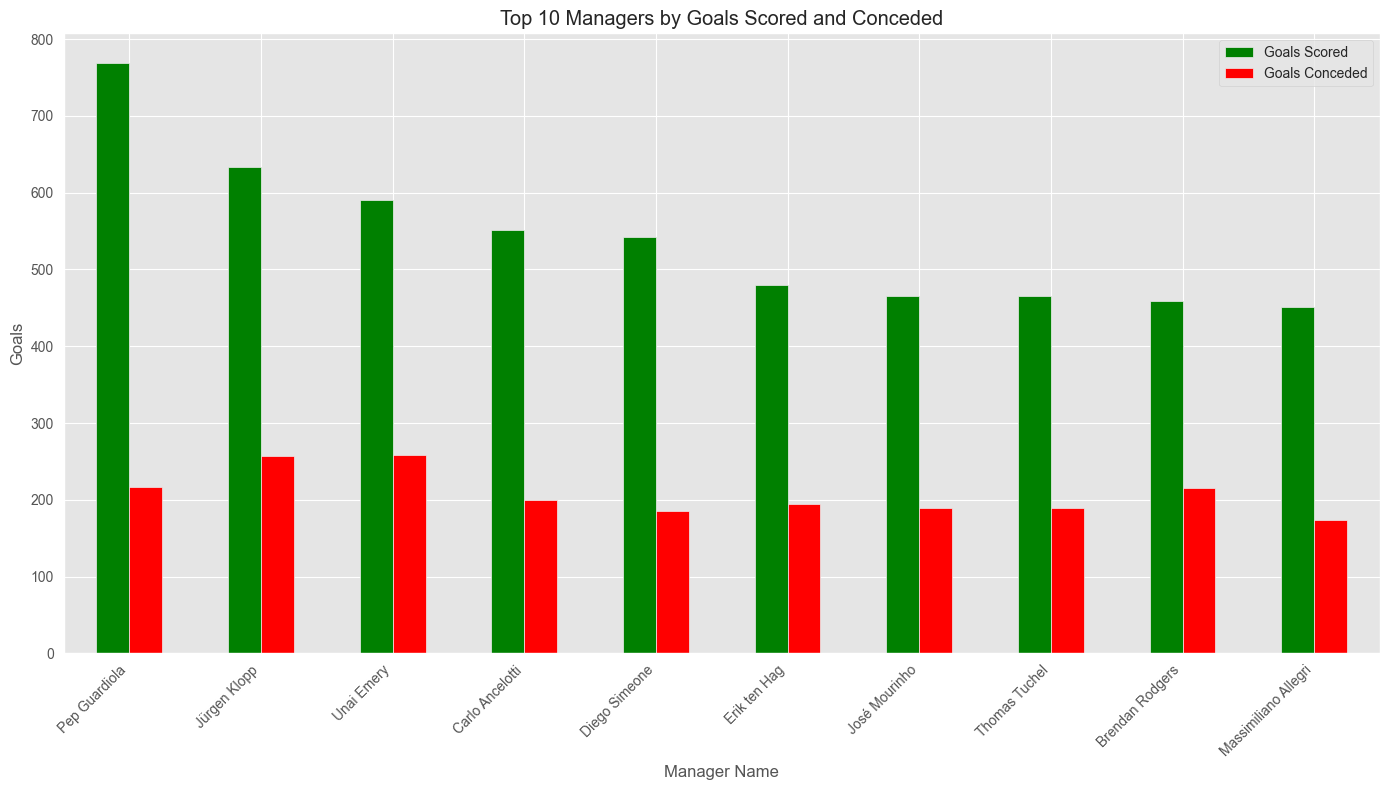

In [28]:
# Goals scored and conceded by managers
manager_performance = df_final_games.groupby('home_club_manager_name').agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum'
}).rename(columns={'home_club_goals': 'Goals Scored', 'away_club_goals': 'Goals Conceded'}).sort_values(by='Goals Scored', ascending=False).head(10)

# Plotting Managerial Performance
manager_performance.plot(kind='bar', figsize=(14, 8), color=['green', 'red'])
plt.title('Top 10 Managers by Goals Scored and Conceded')
plt.xlabel('Manager Name')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

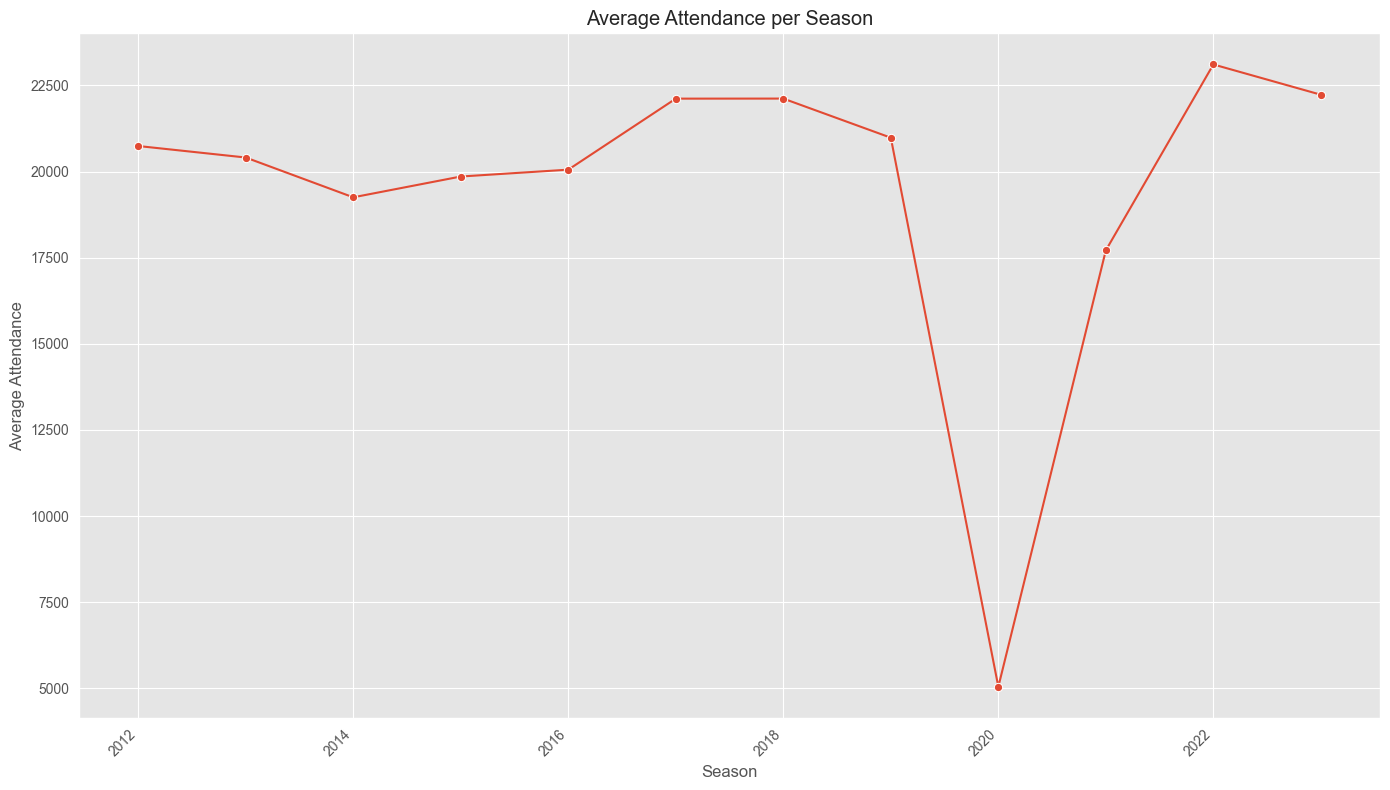

In [29]:
df_final_games['attendance'] = pd.to_numeric(df_final_games['attendance'], errors='coerce')

# Extract year from date
df_final_games['year'] = pd.to_datetime(df_final_games['date']).dt.year

# Average attendance per season
seasonal_attendance = df_final_games.groupby('season')['attendance'].mean().sort_values()

# Plotting Seasonal Trends in Attendance
plt.figure(figsize=(14, 8))
sns.lineplot(x=seasonal_attendance.index, y=seasonal_attendance.values, marker='o')
plt.title('Average Attendance per Season')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


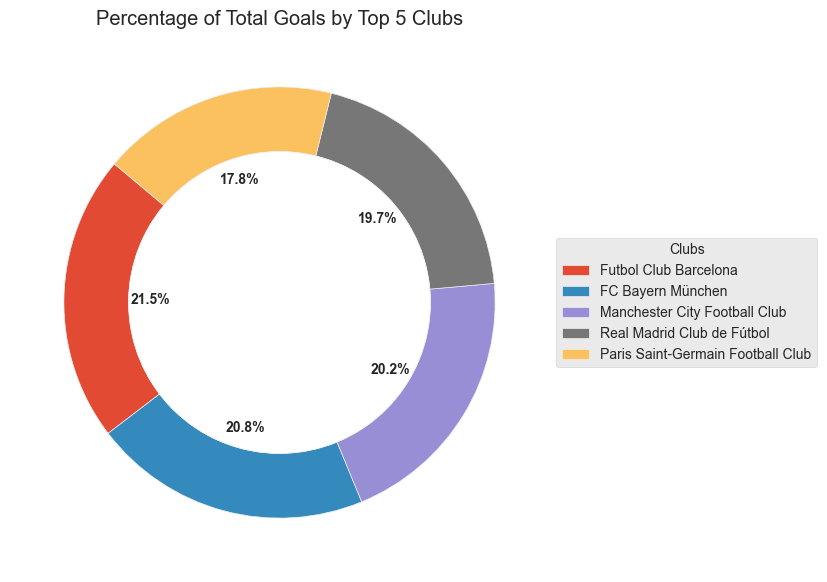

In [30]:
home_goals = df_final_games.groupby('home_club_name')['home_club_goals'].sum().sort_values(ascending=False).head(5)

# Create the Doughnut Chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

# Data for plotting
data = home_goals.values
clubs = home_goals.index

# Create a pie chart
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add labels
ax.legend(wedges, clubs, title="Clubs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
plt.title("Percentage of Total Goals by Top 5 Clubs")
plt.show()

---
### EVENTS

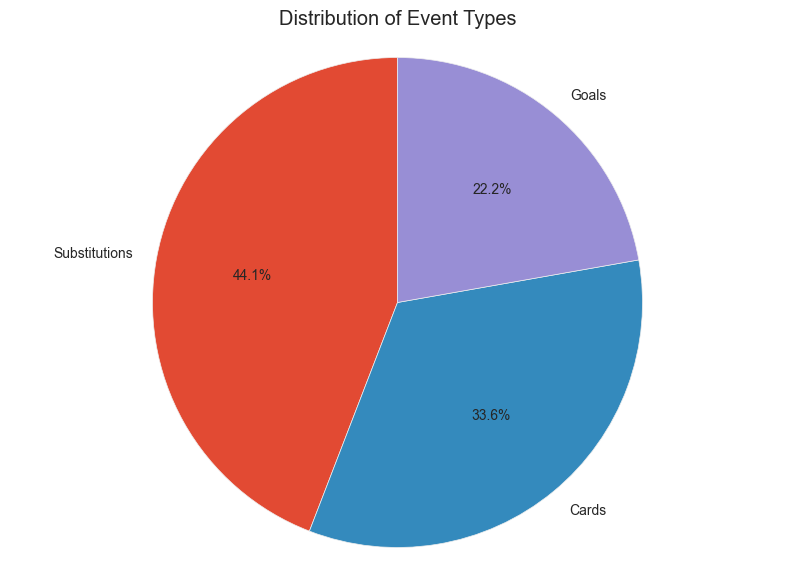

In [31]:
event_type_counts = df_events['type'].value_counts()

# Plotting the Pie Chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Event Types')
plt.show()

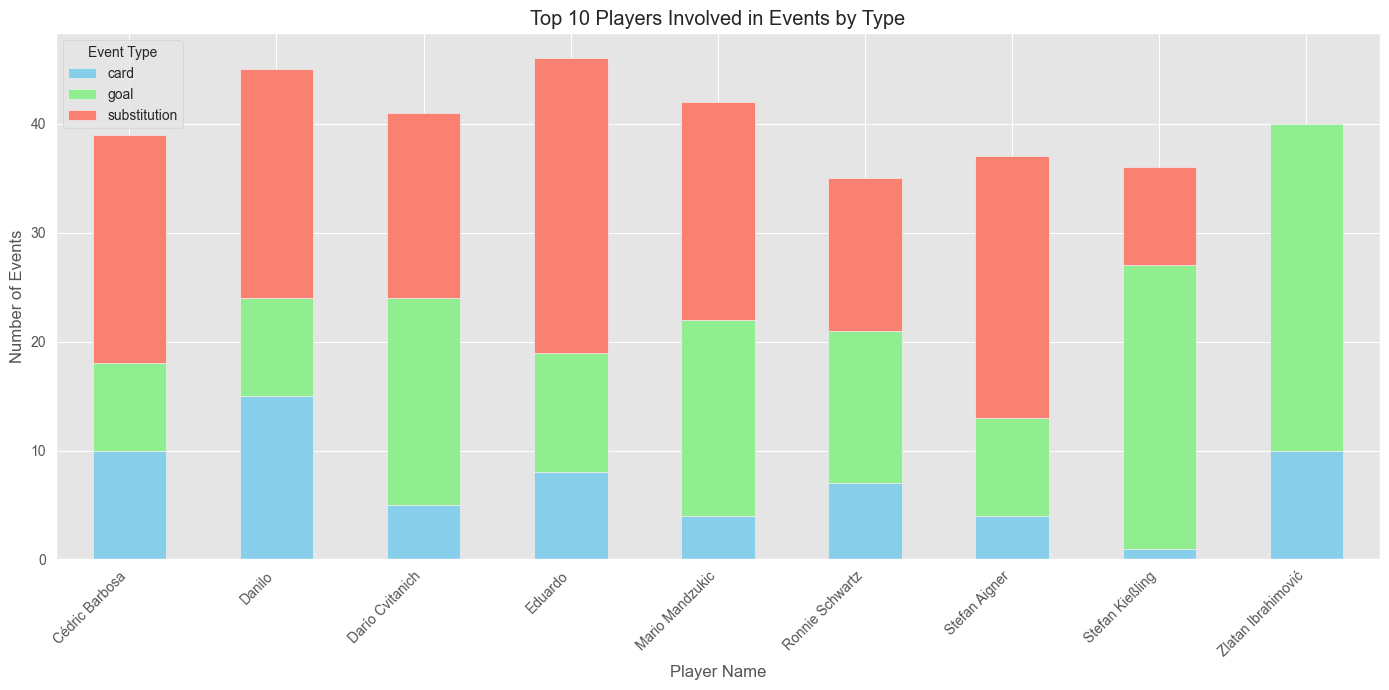

In [32]:
# Drop rows where 'player_name' is NaN
df_events = df_events.dropna(subset=['player_name'])

# Filter the top 10 players involved in events
top_players = df_events['player_name'].value_counts().head(10).index
df_top_players = df_events[df_events['player_name'].isin(top_players)].copy()

# Define event types
def categorize_event(event_type):
    if 'substitution' in event_type.lower():
        return 'substitution'
    elif 'goal' in event_type.lower():
        return 'goal'
    elif 'card' in event_type.lower():
        return 'card'
    else:
        return 'other'


df_top_players.loc[:, 'event_type'] = df_top_players['type'].apply(categorize_event)
# Create a pivot table to count the types of events for each player
pivot_df = df_top_players.pivot_table(index='player_name', columns='event_type', aggfunc='size', fill_value=0)
pivot_df =  pivot_df.drop('NaN')

if 'other' in pivot_df.columns:
    pivot_df = pivot_df.drop(columns='other')

# Plotting the Stacked Bar Chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Top 10 Players Involved in Events by Type')
plt.xlabel('Player Name')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


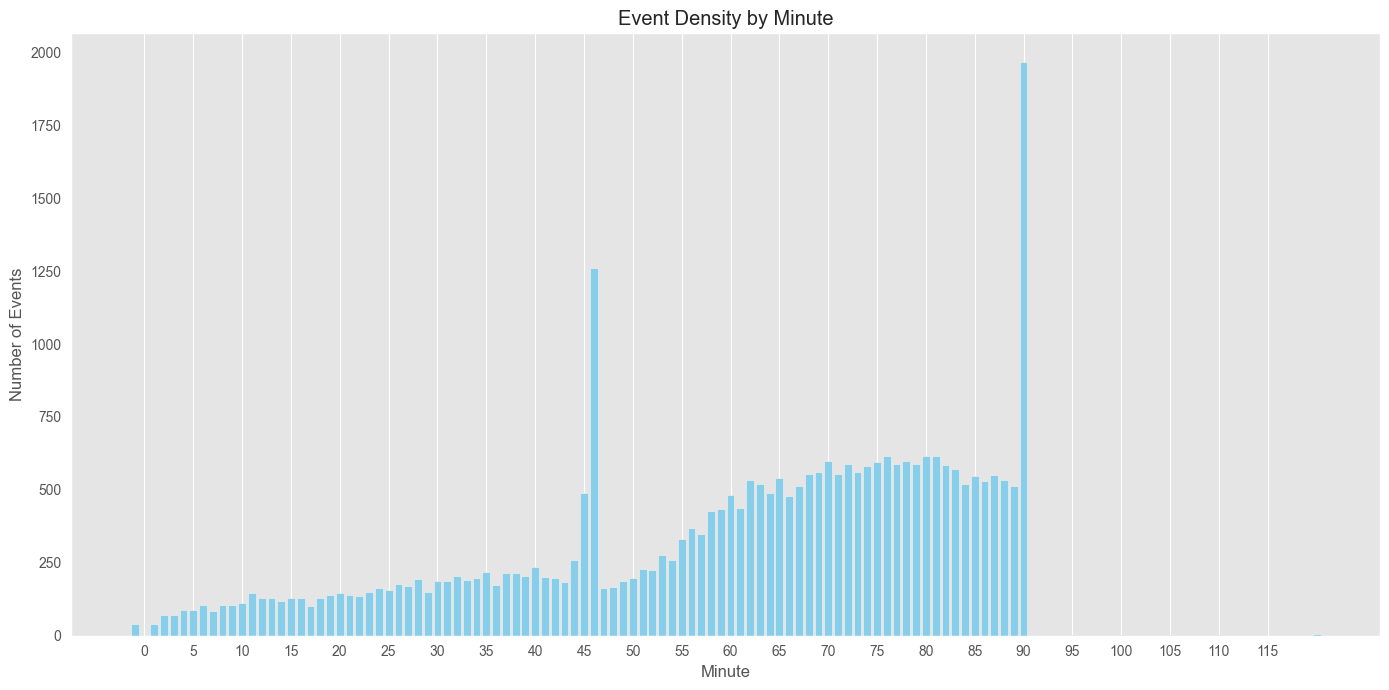

In [33]:
# Grouping events by minute
events_by_minute = df_events.groupby('minute').size()

# Plotting the Bar Plot
plt.figure(figsize=(14, 7))
plt.bar(events_by_minute.index, events_by_minute.values, color='skyblue')
plt.title('Event Density by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.xticks(range(0, int(events_by_minute.index.max()), 5))
plt.tight_layout()
plt.show()

---
### LINEUPS

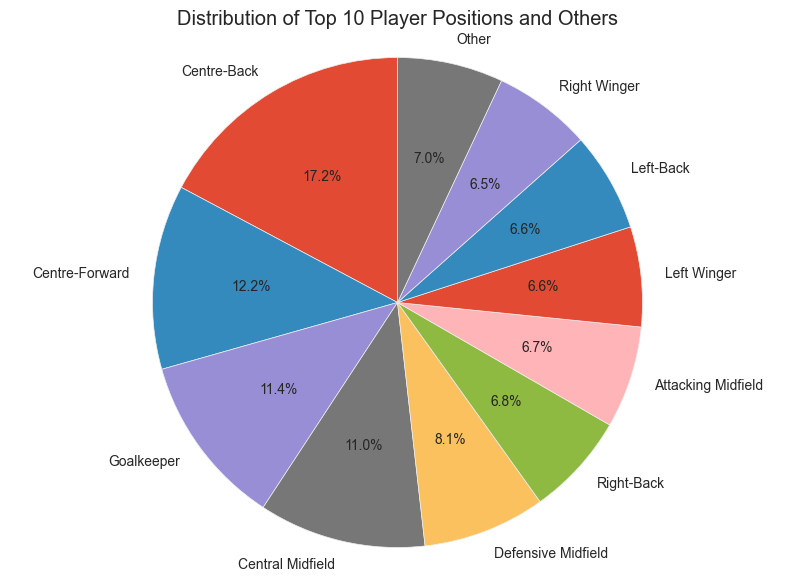

In [34]:
# Distribution of Player Positions
position_counts = df_lineups['position'].value_counts()

# Limit to the top 12 positions, group the rest as "Other"
top_positions = position_counts.head(10)
other_positions_count = position_counts[10:].sum()
top_positions['Other'] = other_positions_count

# Plotting the Pie Chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(top_positions, labels=top_positions.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Top 10 Player Positions and Others')
plt.show()


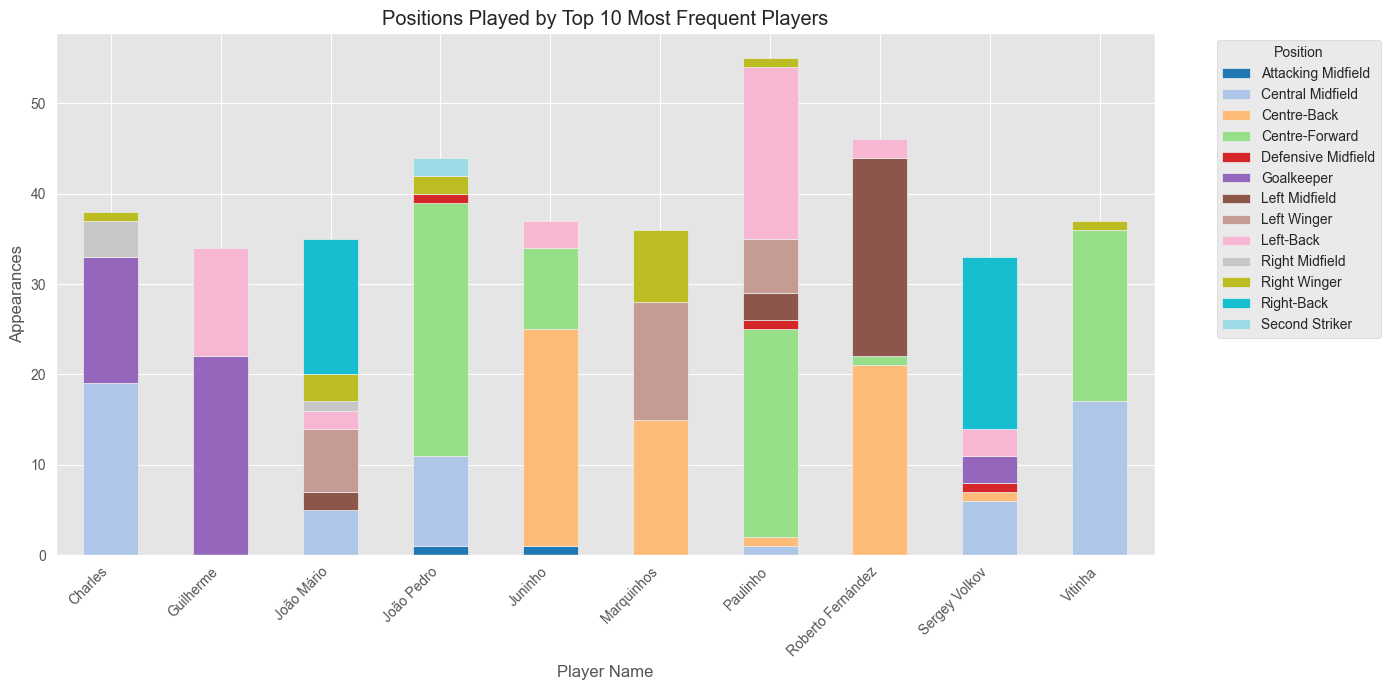

In [35]:
# Get the top 10 most frequent players
top_players = df_lineups['player_name'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 players
df_top_players = df_lineups[df_lineups['player_name'].isin(top_players)]

# Group by player_name and position to count appearances
position_counts = df_top_players.groupby(['player_name', 'position']).size().unstack(fill_value=0)

# Plotting the Grouped Bar Chart
position_counts.plot(kind='bar', figsize=(14, 7), stacked=True, colormap='tab20')
plt.title('Positions Played by Top 10 Most Frequent Players')
plt.xlabel('Player Name')
plt.ylabel('Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

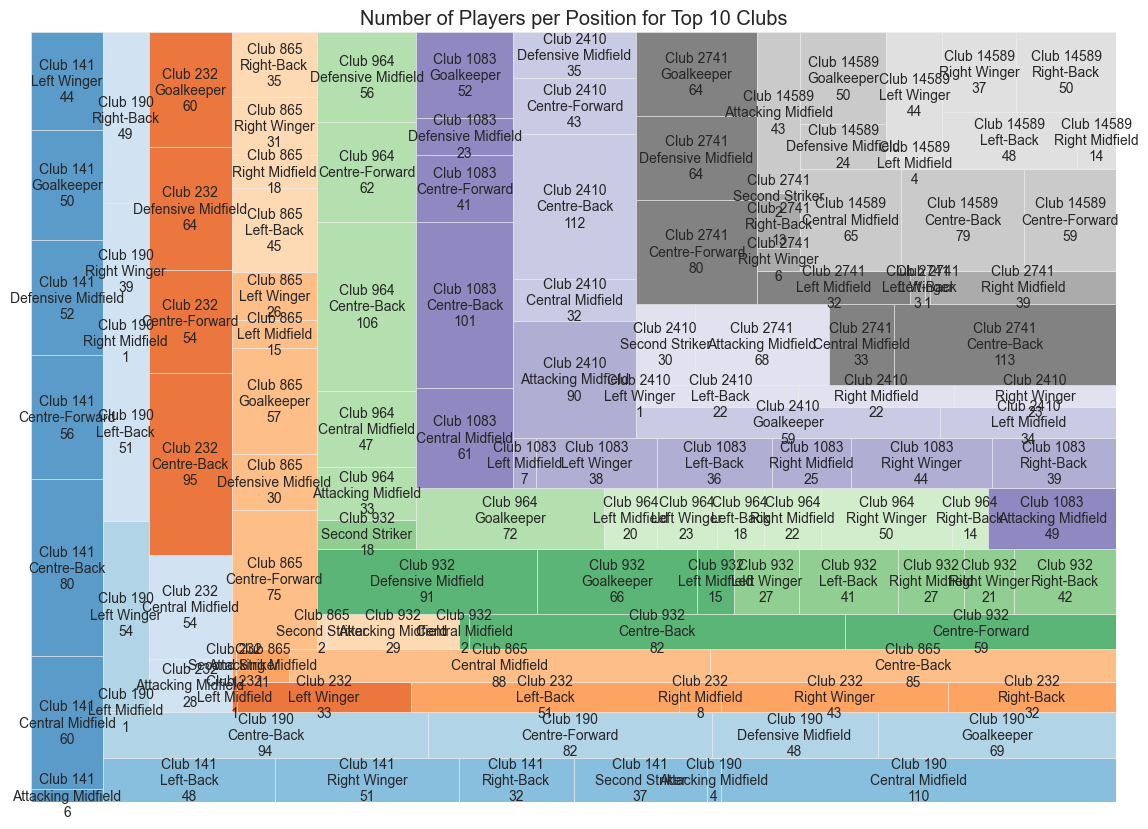

In [36]:
# Group by club_id and position to count the number of players
club_position_counts = df_lineups.groupby(['club_id', 'position']).size().reset_index(name='counts')

# Focus on the top 10 clubs with the most players
top_clubs = club_position_counts.groupby('club_id')['counts'].sum().nlargest(10).index
top_club_position_counts = club_position_counts[club_position_counts['club_id'].isin(top_clubs)]

# Create a list for sizes and labels
sizes = top_club_position_counts['counts']
labels = [f"Club {row['club_id']}\n{row['position']}\n{row['counts']}" for idx, row in top_club_position_counts.iterrows()]

cmap = plt.cm.tab20c
colors = [cmap(i / float(len(top_club_position_counts))) for i in range(len(top_club_position_counts))]

# Plotting the Treemap
plt.figure(figsize=(14, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Number of Players per Position for Top 10 Clubs')
plt.axis('off')
plt.show()

---
### CLUBS

In [37]:
df_clubs= df_clubs.drop(columns=['total_market_value'])

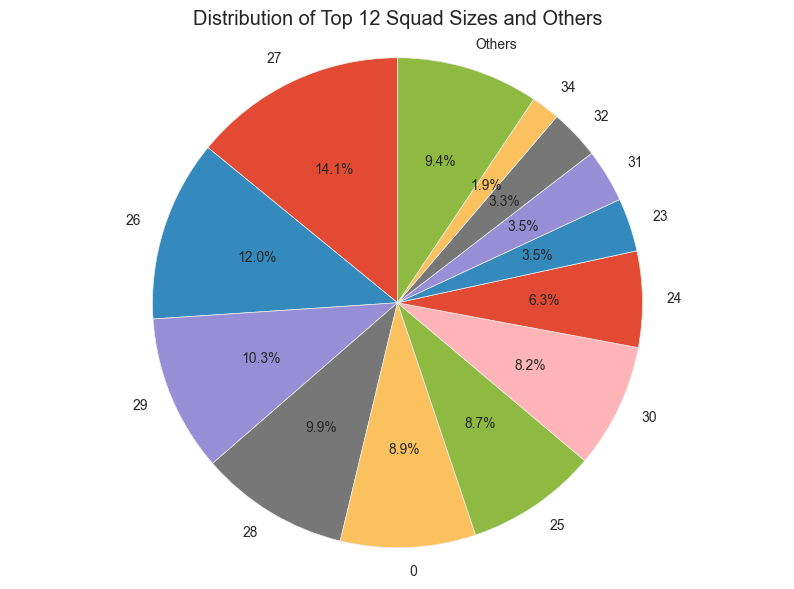

In [38]:
# Distribution of Squad Sizes
squad_size_counts = df_clubs['squad_size'].value_counts()

# Limit to the top 12 squad sizes, group the rest as "Others"
top_squad_sizes = squad_size_counts.head(12)
other_squad_sizes_count = squad_size_counts[12:].sum()
top_squad_sizes['Others'] = other_squad_sizes_count

# Plotting the Pie Chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(top_squad_sizes, labels=top_squad_sizes.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Distribution of Top 12 Squad Sizes and Others')
plt.show()


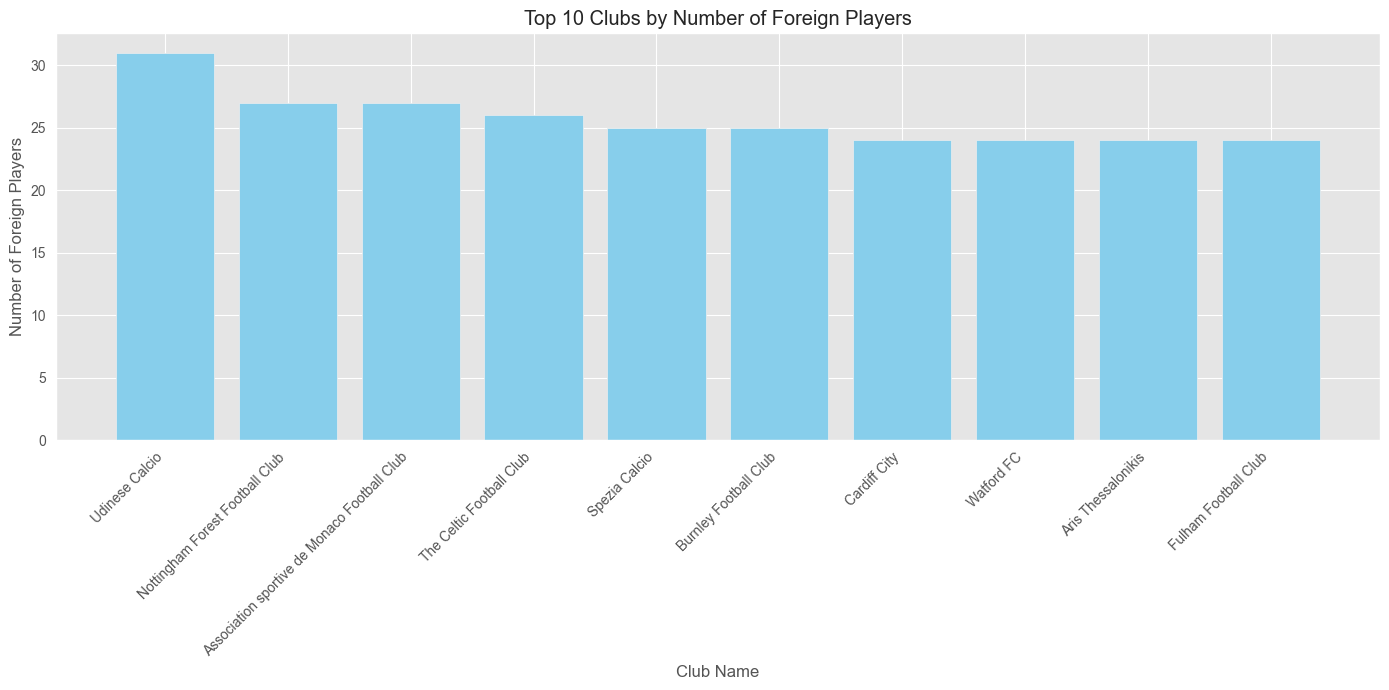

In [39]:
top_foreigners_clubs = df_clubs.nlargest(10, 'foreigners_number')[['name', 'foreigners_number']]

# Plotting the Bar Chart
plt.figure(figsize=(14, 7))
plt.bar(top_foreigners_clubs['name'], top_foreigners_clubs['foreigners_number'], color='skyblue')
plt.title('Top 10 Clubs by Number of Foreign Players')
plt.xlabel('Club Name')
plt.ylabel('Number of Foreign Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

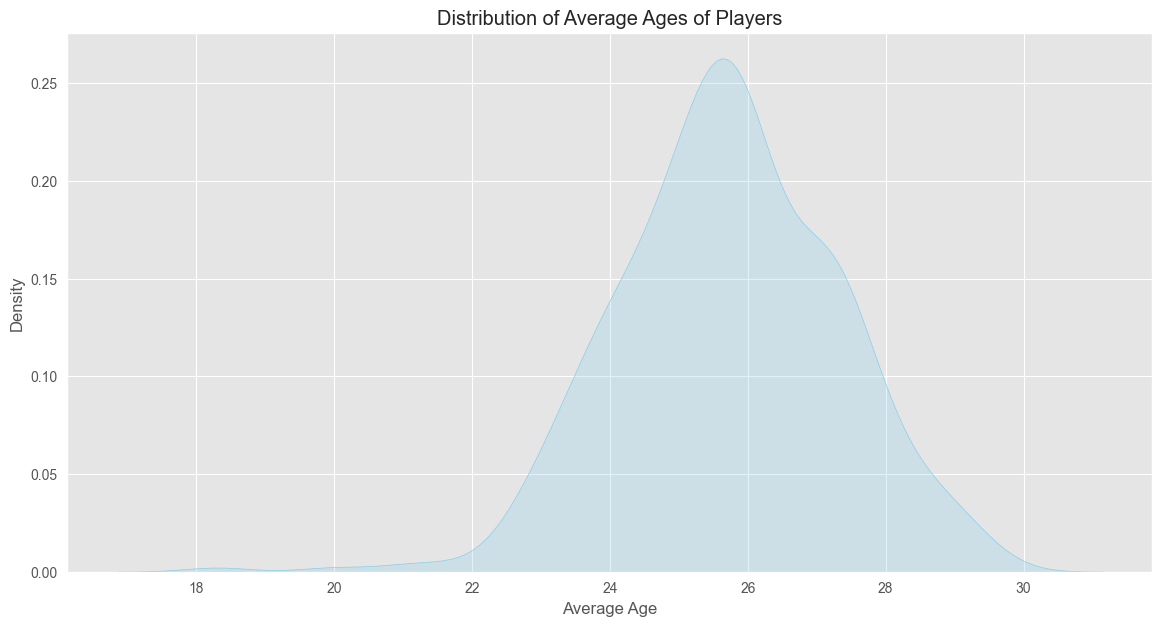

In [40]:
df_clubs['average_age'] = pd.to_numeric(df_clubs['average_age'], errors='coerce')
df_clubs = df_clubs.dropna(subset=['average_age'])

# Plotting the Bell Curve (KDE Plot)
plt.figure(figsize=(14, 7))
sns.kdeplot(df_clubs['average_age'], fill=True, color="skyblue")
plt.title('Distribution of Average Ages of Players')
plt.xlabel('Average Age')
plt.ylabel('Density')
plt.show()

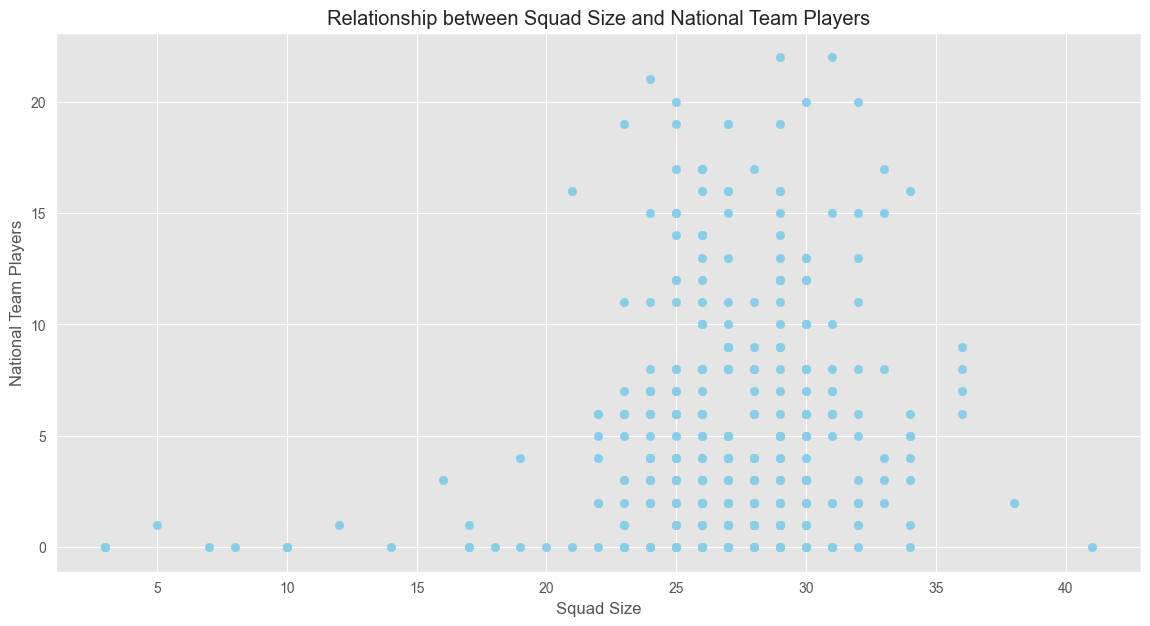

In [41]:
# Plotting the Scatter Plot
plt.figure(figsize=(14, 7))
plt.scatter(df_clubs['squad_size'], df_clubs['national_team_players'], color='skyblue')
plt.title('Relationship between Squad Size and National Team Players')
plt.xlabel('Squad Size')
plt.ylabel('National Team Players')
plt.grid(True)
plt.show()

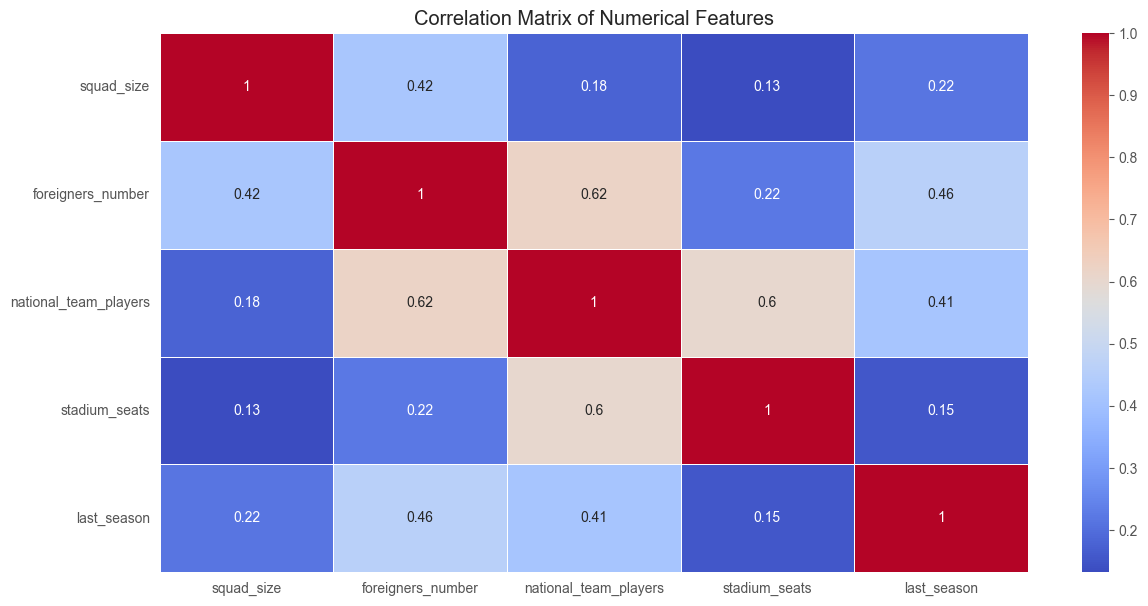

In [42]:
numerical_features = df_clubs[['squad_size', 'foreigners_number', 'national_team_players', 'stadium_seats', 'last_season']]

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

---
### PLAYERS

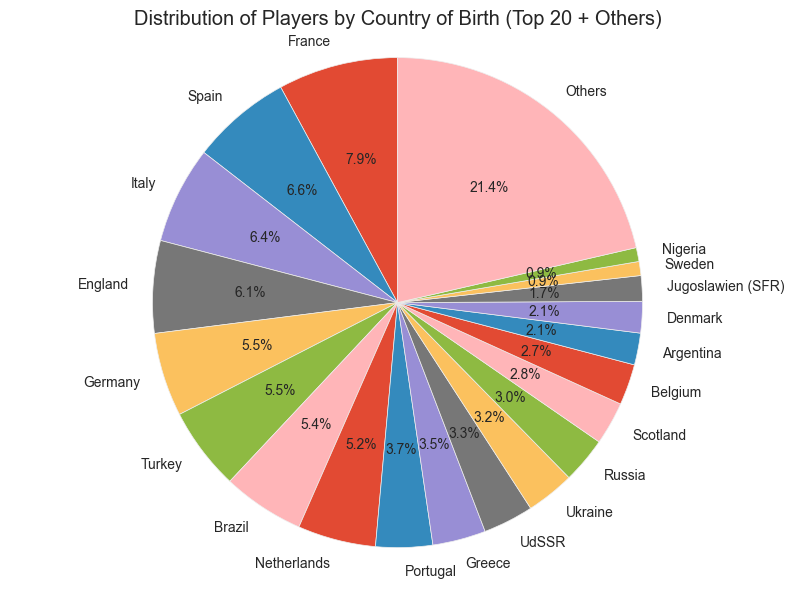

In [43]:
# Distribution of Players by Country of Birth
country_counts = df_players['country_of_birth'].value_counts()

# Limit to the top 25 countries, group the rest as "Others"
top_countries = country_counts.head(20)
other_countries_count = country_counts[20:].sum()
top_countries['Others'] = other_countries_count

# Plotting the Pie Chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Players by Country of Birth (Top 20 + Others)')
plt.show()

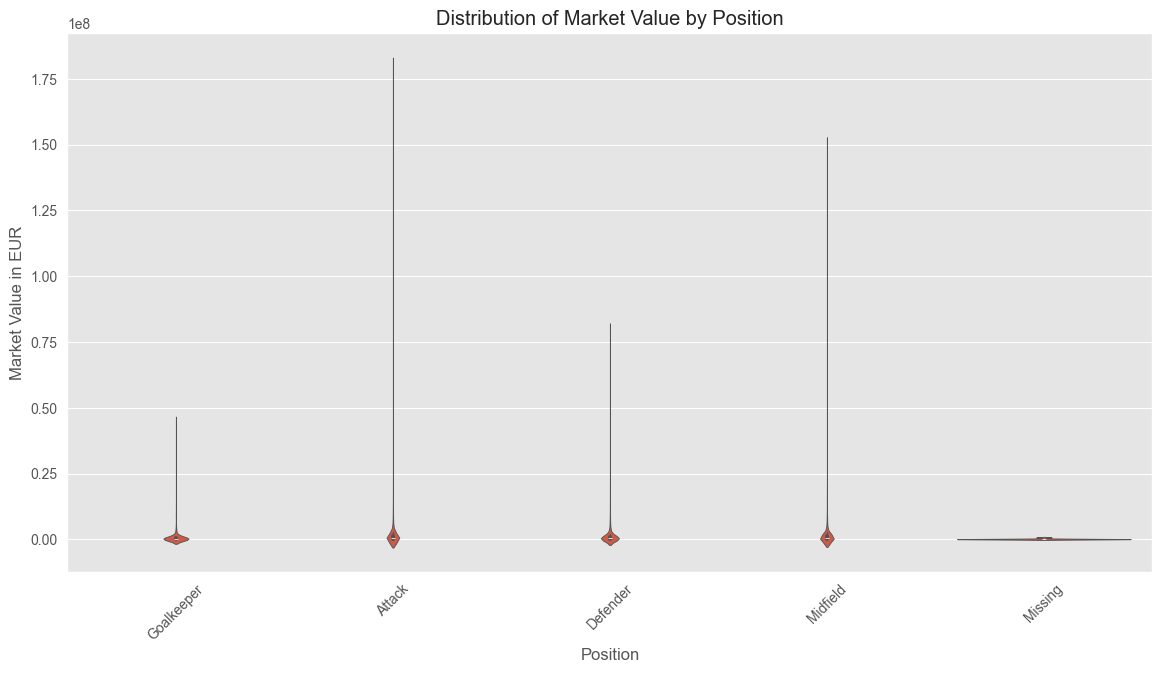

In [44]:
# Plotting the Violin Plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='position', y='market_value_in_eur', data=df_players)
plt.title('Distribution of Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.show()

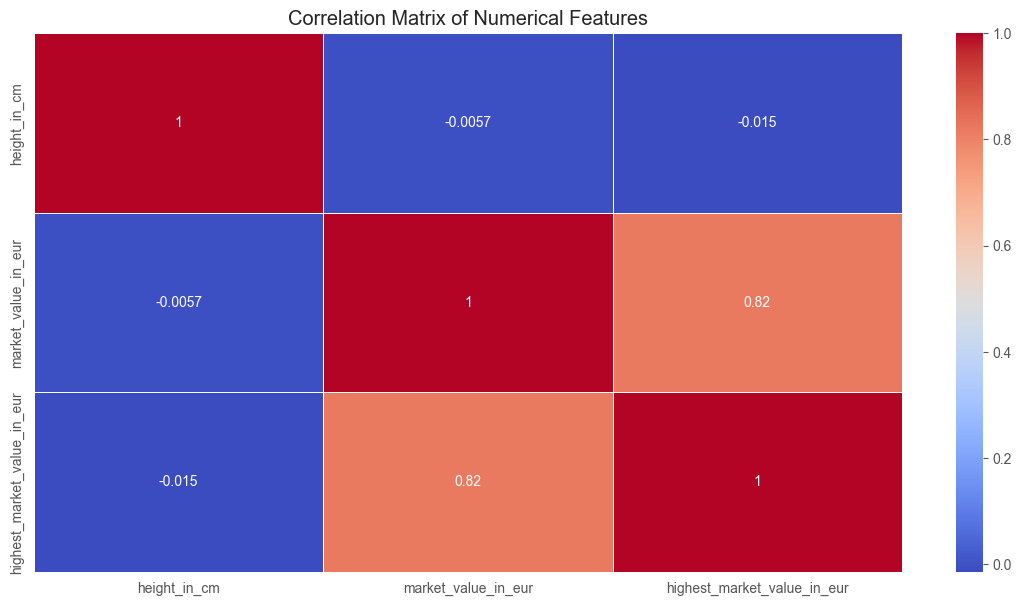

In [45]:
# Selecting numerical features
numerical_features = df_players[['height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']]

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


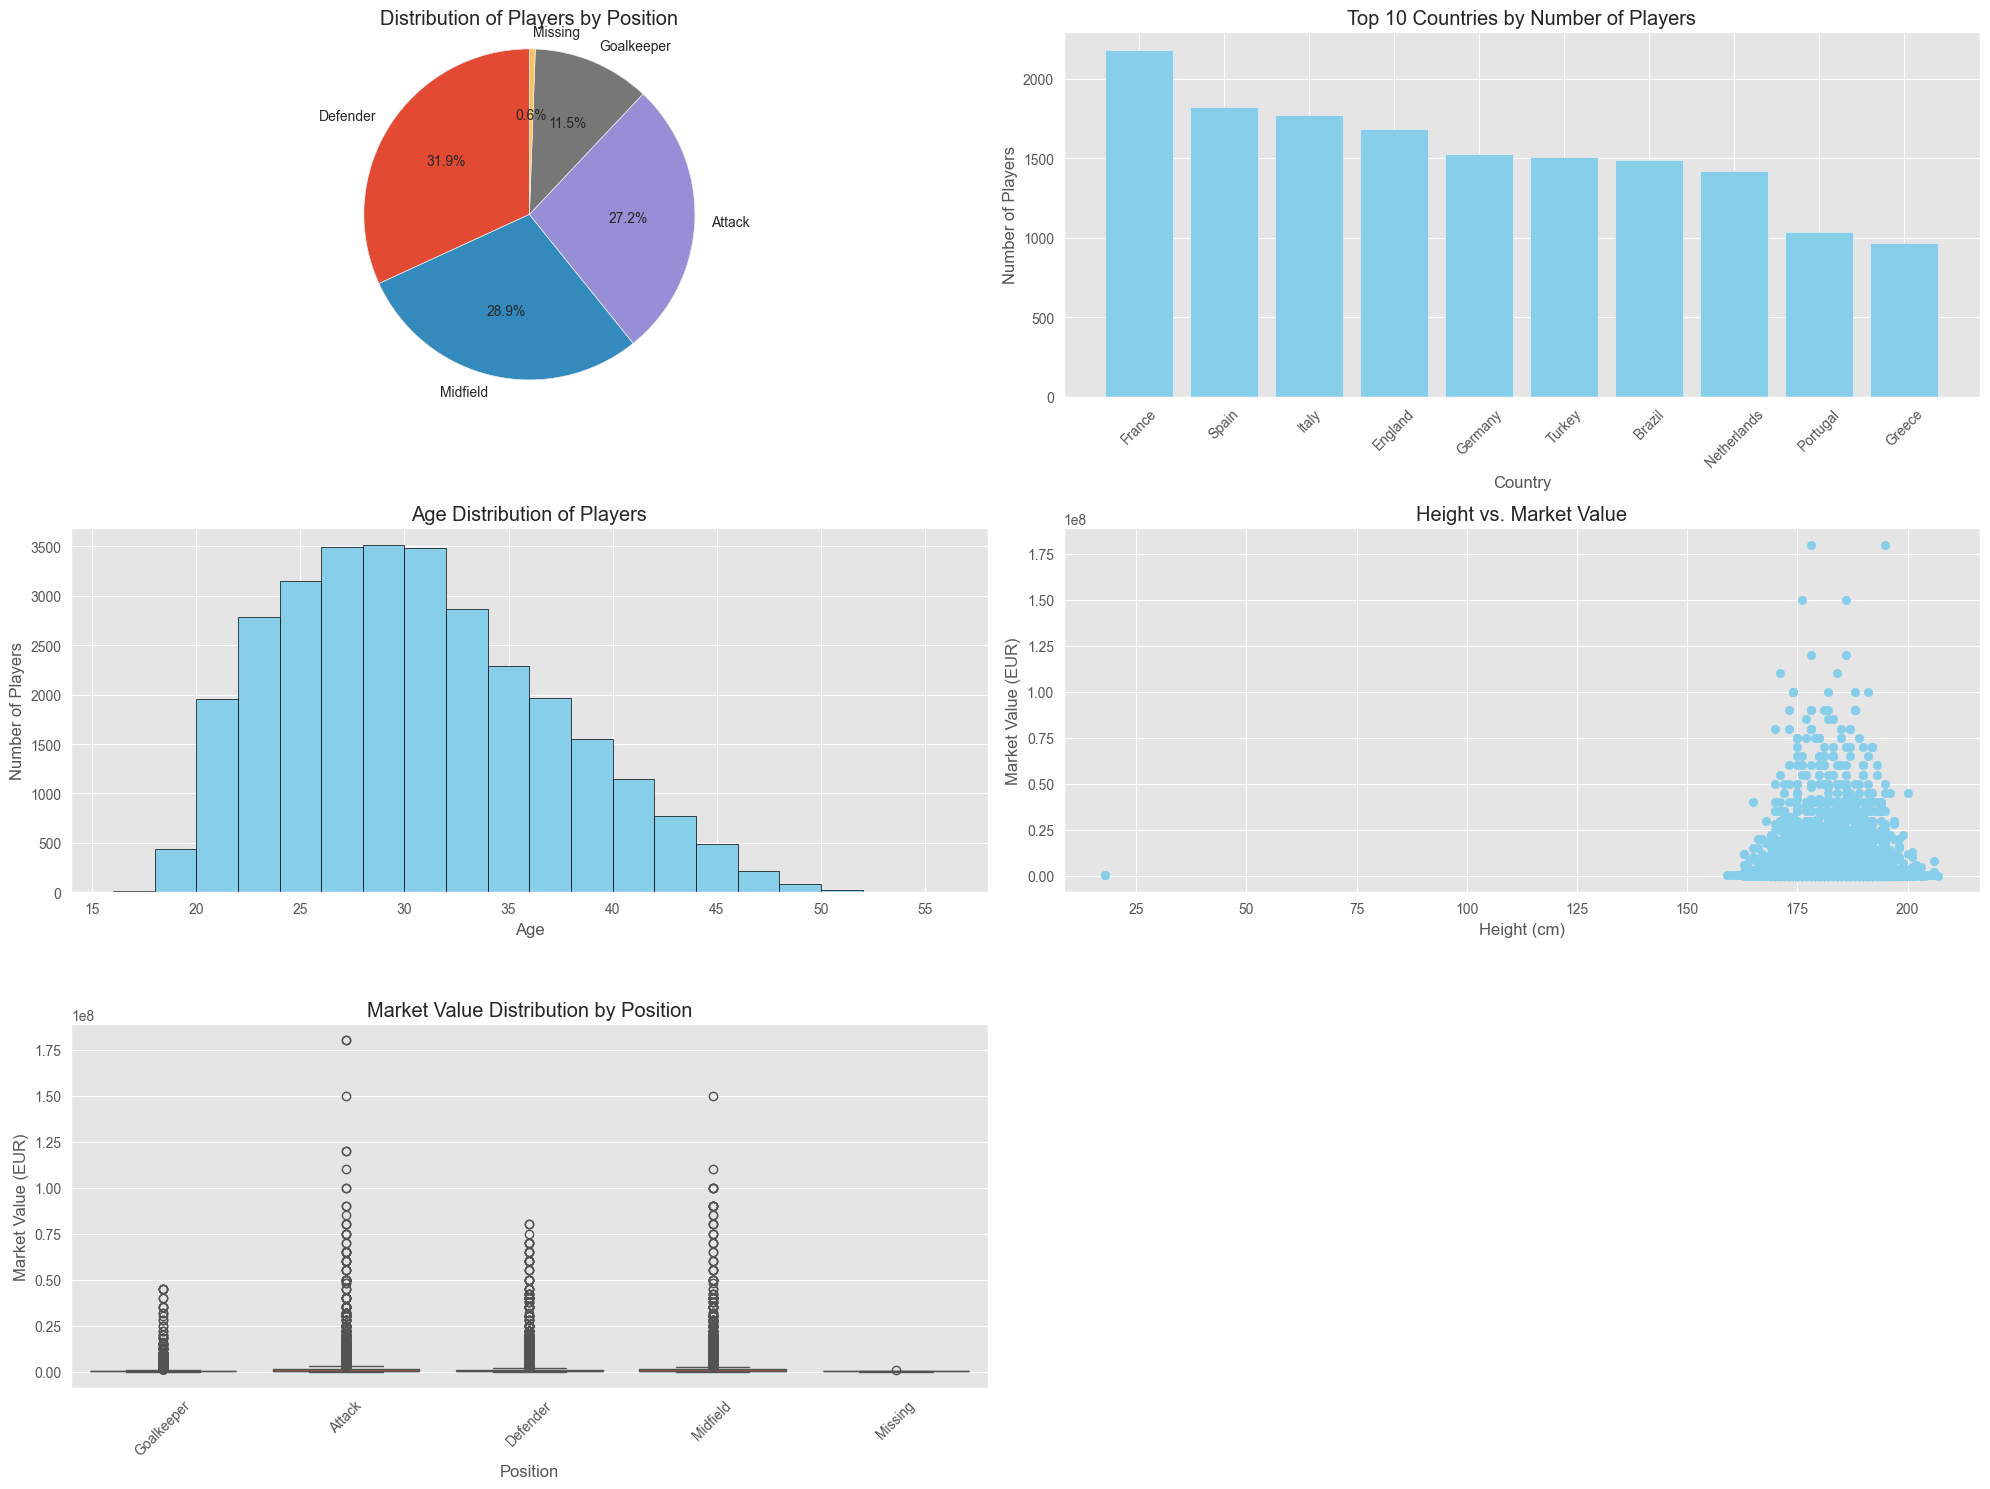

In [46]:
# Convert 'date_of_birth' to datetime and calculate age
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])
current_year = pd.Timestamp.now().year
df_players['age'] = current_year - df_players['date_of_birth'].dt.year

# Initialize the figure
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Pie Chart: Distribution of Players by Position
position_counts = df_players['position'].value_counts()
axs[0, 0].pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].axis('equal')
axs[0, 0].set_title('Distribution of Players by Position')

# Bar Chart: Top 10 Countries by Number of Players
country_counts = df_players['country_of_birth'].value_counts().head(10)
axs[0, 1].bar(country_counts.index, country_counts.values, color='skyblue')
axs[0, 1].set_title('Top 10 Countries by Number of Players')
axs[0, 1].set_xlabel('Country')
axs[0, 1].set_ylabel('Number of Players')
axs[0, 1].tick_params(axis='x', rotation=45)

# Histogram: Age Distribution of Players
axs[1, 0].hist(df_players['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Age Distribution of Players')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Number of Players')

# Scatter Plot: Height vs. Market Value
axs[1, 1].scatter(df_players['height_in_cm'], df_players['market_value_in_eur'], color='skyblue')
axs[1, 1].set_title('Height vs. Market Value')
axs[1, 1].set_xlabel('Height (cm)')
axs[1, 1].set_ylabel('Market Value (EUR)')
axs[1, 1].grid(True)

# Box Plot: Market Value Distribution by Position
sns.boxplot(x='position', y='market_value_in_eur', data=df_players, ax=axs[2, 0])
axs[2, 0].set_title('Market Value Distribution by Position')
axs[2, 0].set_xlabel('Position')
axs[2, 0].set_ylabel('Market Value (EUR)')
axs[2, 0].tick_params(axis='x', rotation=45)

# Remove the empty subplot (bottom-right)
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

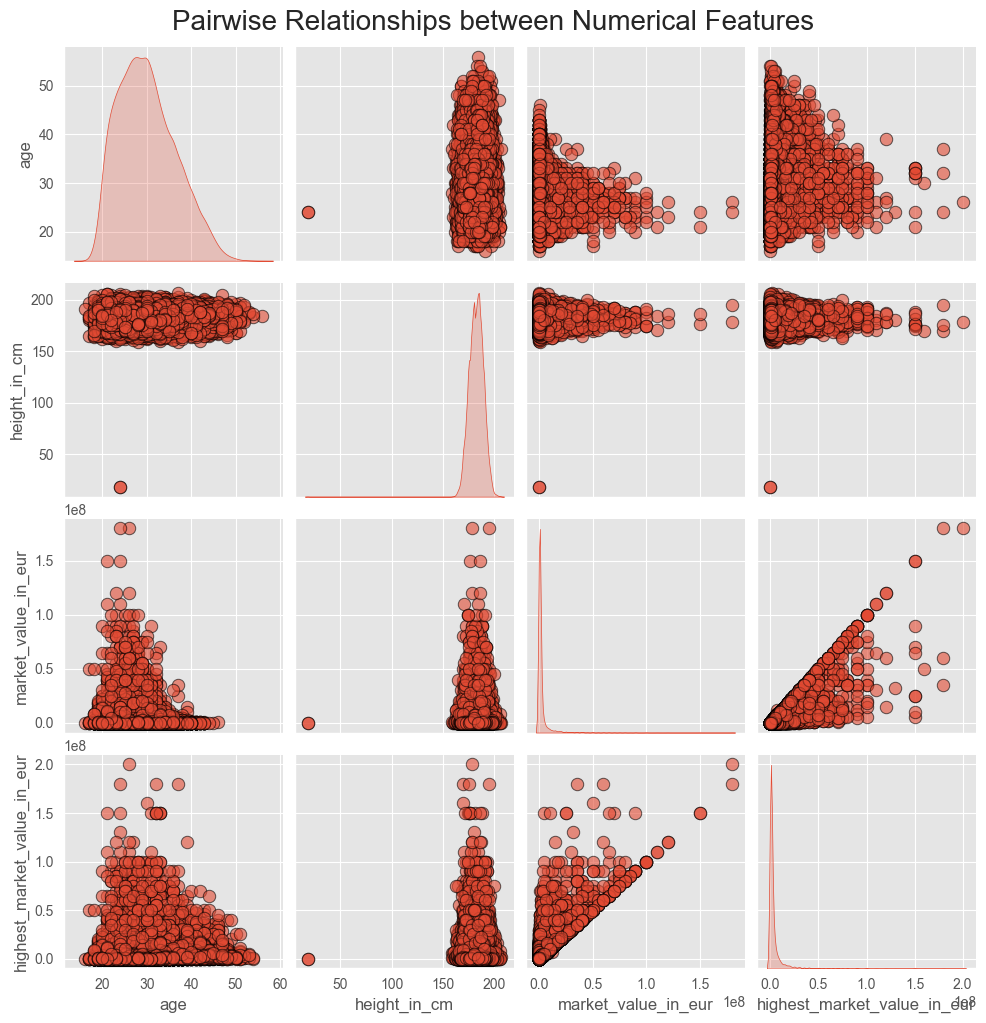

In [47]:
# Convert 'date_of_birth' to datetime and calculate age
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])
current_year = pd.Timestamp.now().year
df_players['age'] = current_year - df_players['date_of_birth'].dt.year

# Selecting relevant numerical features for the pair plot
numerical_features = df_players[['age', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']]

# Plotting the Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(numerical_features, diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02, fontsize=20)
plt.show()